### Mohamed Abdelwahab
### 43-18031

#### Classification Assignment - Deadline & Evaluation Sunday 12 June

#### You are required to build a classification model using the below dataset on online payments to determine if a payment Is Fraudulent or not:

#### https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

#### Requirements:

#### - Divide dataset after importing into Train/Cross Validation/Test

#### - Test various hypothesis with different degrees and optimize your model and parameters using cross validation & test sets as explained in the lecture

#### - Apply K-Fold & Stratified Sampling techniques

#### - Apply Regularization and optimize the value of its parameter

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime

from sklearn.datasets import load_boston

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Fraud Detection Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<AxesSubplot:xlabel='type', ylabel='count'>

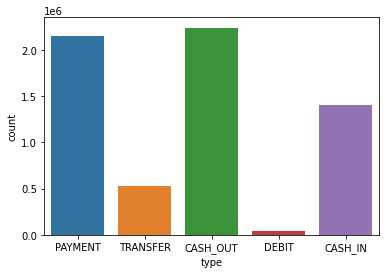

In [6]:
sns.countplot(x='type',data=df)

In [7]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
# Fraud percentage
print(df['isFraud'].value_counts()[1]/len(df)*100,'%')

0.12908204481801522 %


In [9]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [12]:
dummies = pd.get_dummies(df['type'])
dummies

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


In [13]:
df = pd.concat([df,dummies],axis=1)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [14]:
X = df.drop(['type', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud'], axis=1)
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1


In [15]:
Y = df['isFraud']

In [16]:
X = np.array(X)
Y = np.array(Y)

In [17]:
def polynomial_features(degree, train, test):
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    train_poly = poly.fit_transform(train)
    test_poly = poly.transform(test)
    
    return train_poly, test_poly

In [35]:
def splitter(method_name, n_splits):
    
    if method_name == 'sss':
        split_method = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=0)
    elif method_name == 'kfold':
        split_method = k_fold = KFold(n_splits=n_splits)
    elif method_name == 'skfold':
        split_method = StratifiedKFold(n_splits=n_splits)
        
    return split_method

In [ ]:
def polynomial_logistic(degree, split_method_name, splits, C, X, y):
    
    split_method = splitter(split_method_name, splits)

    print('----------------------------------')
    print('degree = ', degree)
    print('splitter method is  ', split_method_name)
    print('Number of splits = ', splits)
    print('----------------------------------')

    splits_scores_train = []  
    splits_scores_test = []
    split = 1 
    for train_index, test_index in split_method.split(X, y):
        print("split number " , split )
        split+=1
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        
        (unique, counts) = np.unique(Y_train, return_counts=True)
        frequencies = np.asarray((unique, counts)).T
        print(frequencies)
        
        train_poly, test_poly = polynomial_features(degree, train=X_train, test=X_test)    
        print('Train data and test data shapes are: ', train_poly.shape, test_poly.shape)
        print('----------------------------------')
        
        for c in C:
            
            print('C = ', c)
            print('degree = ', degree)
            print('----------------------------------')
            model = LogisticRegression(random_state=0, C=c)

            model.fit(train_poly, Y_train)

            y_pred = model.predict(test_poly)
            y_pred_train = model.predict(train_poly)
            print('accuracy_score_train = ',accuracy_score(y_pred_train, Y_train))
            print('precision_score_train = ',precision_score(y_pred_train, Y_train))
            print('f1_score_train = ', f1_score(y_pred_train, Y_train))
            
            print('accuracy_score_test = ',accuracy_score(y_pred, Y_test))
            print('precision_score_test = ',precision_score(y_pred, Y_test))
            print('f1_score_test = ', f1_score(y_pred, Y_test))

            matrix = confusion_matrix(Y_test,y_pred)
            print(matrix)
            figure = plt.figure(figsize=(8, 8))
            sns.heatmap(matrix, annot=True,cmap=plt.cm.Blues)
            plt.tight_layout()
            plt.ylabel('True label')
            plt.xlabel('Predicted label')
            plt.show()
            print('*******************************************')
            splits_scores_train.append(f1_score(y_pred_train, Y_train))
            splits_scores_test.append(f1_score(y_pred, Y_test))
    return splits_scores_train, splits_scores_test

----------------------------------
degree =  1
splitter method is   sss
Number of splits =  5
----------------------------------
split number  1
[[      0 5083526]
 [      1    6570]]
Train data and test data shapes are:  (5090096, 11) (1272524, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9983650603053459
precision_score_train =  0.43881278538812785
accuracy_score_test =  0.9983355913130125
precision_score_test =  0.43213633597078516
f1_score =  0.40135669869983037
[[1269696    1185]
 [    933     710]]


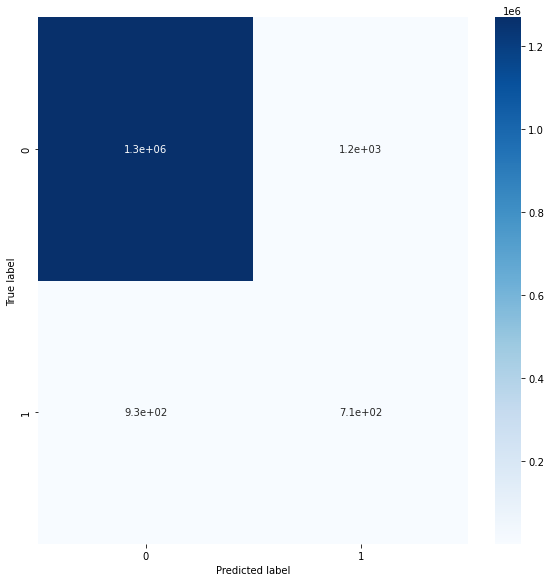

*******************************************
C =  0.1
degree =  1
----------------------------------
accuracy_score_train =  0.9983650603053459
precision_score_train =  0.43881278538812785
accuracy_score_test =  0.9983363771528081
precision_score_test =  0.43213633597078516
f1_score =  0.40147017246253885
[[1269697    1184]
 [    933     710]]


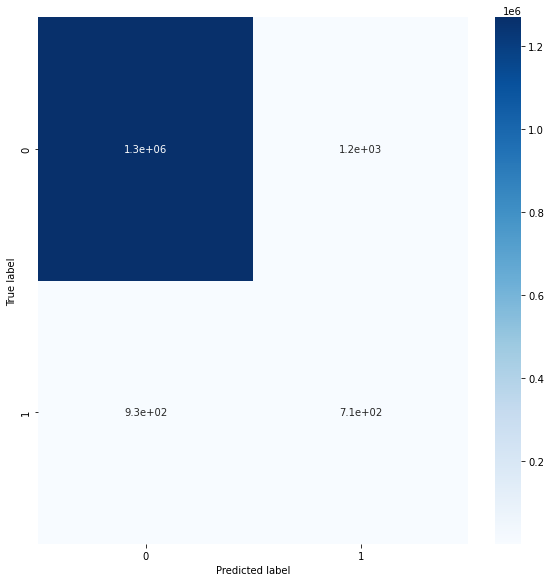

*******************************************
C =  1e-05
degree =  1
----------------------------------
accuracy_score_train =  0.9983650603053459
precision_score_train =  0.43881278538812785
accuracy_score_test =  0.9983379488323992
precision_score_test =  0.43274497869750456
f1_score =  0.40203562340966925
[[1269698    1183]
 [    932     711]]


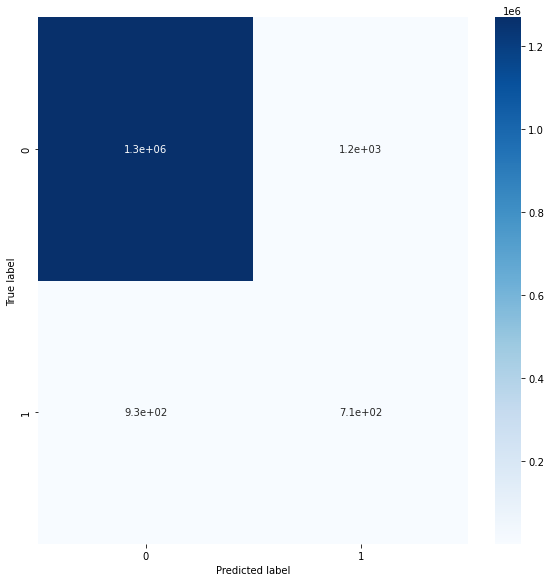

*******************************************
split number  2
[[      0 5083526]
 [      1    6570]]
Train data and test data shapes are:  (5090096, 11) (1272524, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9982699736900836
precision_score_train =  0.423896499238965
accuracy_score_test =  0.9982797966875281
precision_score_test =  0.45161290322580644
f1_score =  0.40402940375714674
[[1269593    1288]
 [    901     742]]


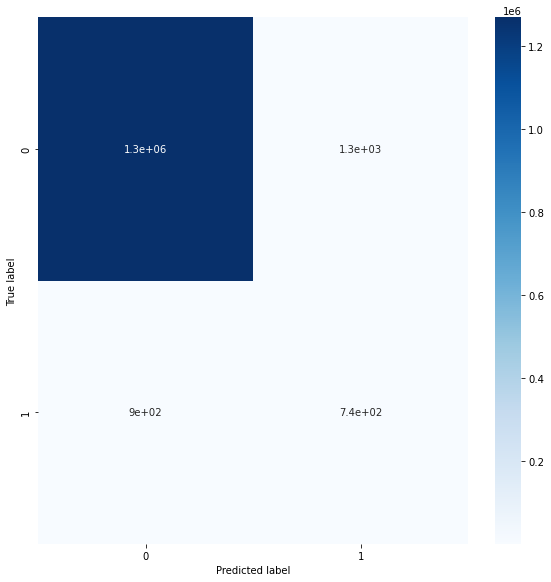

*******************************************
C =  0.1
degree =  1
----------------------------------
accuracy_score_train =  0.9982699736900836
precision_score_train =  0.423896499238965
accuracy_score_test =  0.9982797966875281
precision_score_test =  0.45161290322580644
f1_score =  0.40402940375714674
[[1269593    1288]
 [    901     742]]


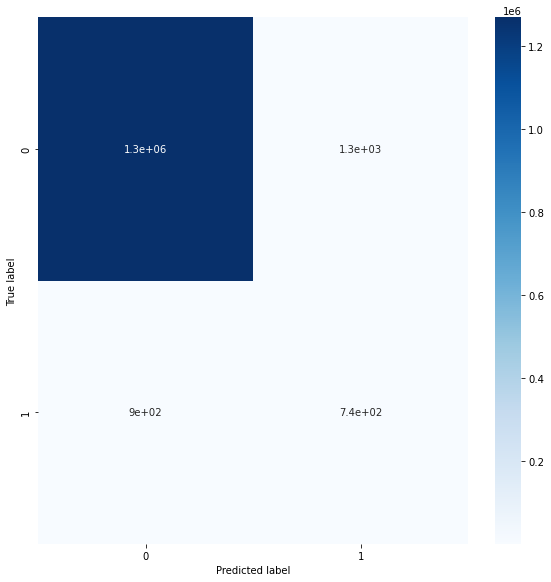

*******************************************
C =  1e-05
degree =  1
----------------------------------
accuracy_score_train =  0.9982703666099815
precision_score_train =  0.42404870624048707
accuracy_score_test =  0.9982797966875281
precision_score_test =  0.45161290322580644
f1_score =  0.40402940375714674
[[1269593    1288]
 [    901     742]]


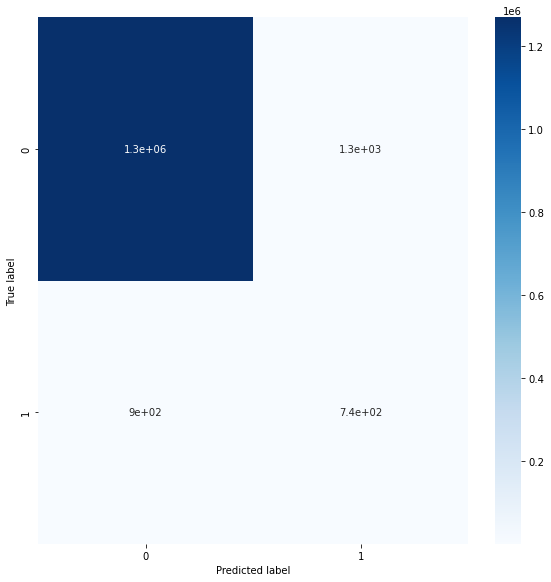

*******************************************
split number  3
[[      0 5083526]
 [      1    6570]]
Train data and test data shapes are:  (5090096, 11) (1272524, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9985766476702993
precision_score_train =  0.6007610350076104
accuracy_score_test =  0.9986074918822749
precision_score_test =  0.5861229458307973
f1_score =  0.5208220659816117
[[1269789    1092]
 [    680     963]]


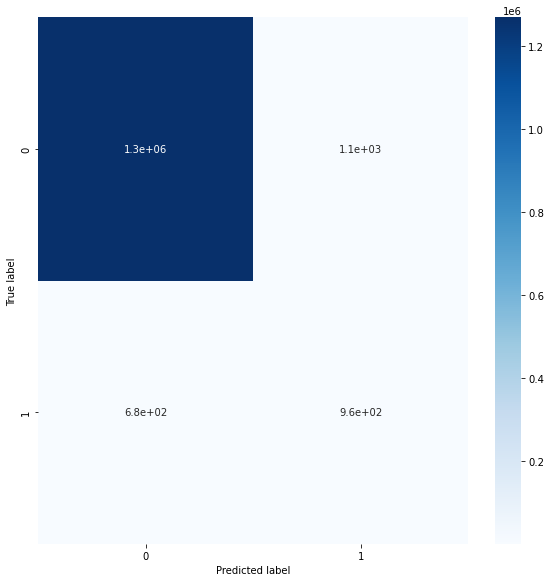

*******************************************
C =  0.1
degree =  1
----------------------------------
accuracy_score_train =  0.9983055329408326
precision_score_train =  0.4380517503805175
accuracy_score_test =  0.9983088727599637
precision_score_test =  0.4351795496043822
f1_score =  0.3992183137911781
[[1269657    1224]
 [    928     715]]


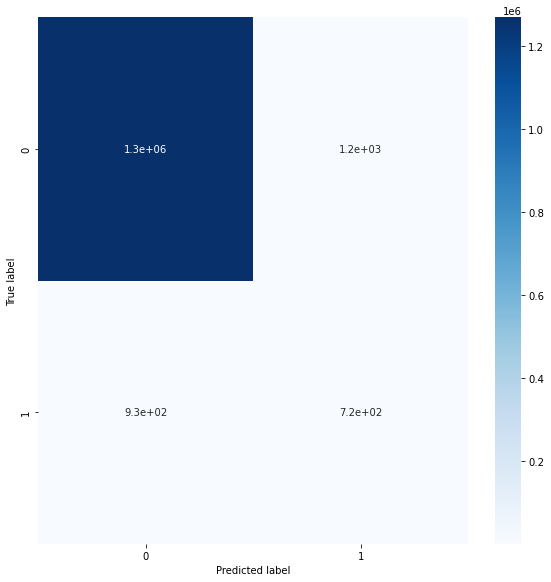

*******************************************
C =  1e-05
degree =  1
----------------------------------
accuracy_score_train =  0.9983053364808837
precision_score_train =  0.4380517503805175
accuracy_score_test =  0.9983096585997592
precision_score_test =  0.4351795496043822
f1_score =  0.3993297961463278
[[1269658    1223]
 [    928     715]]


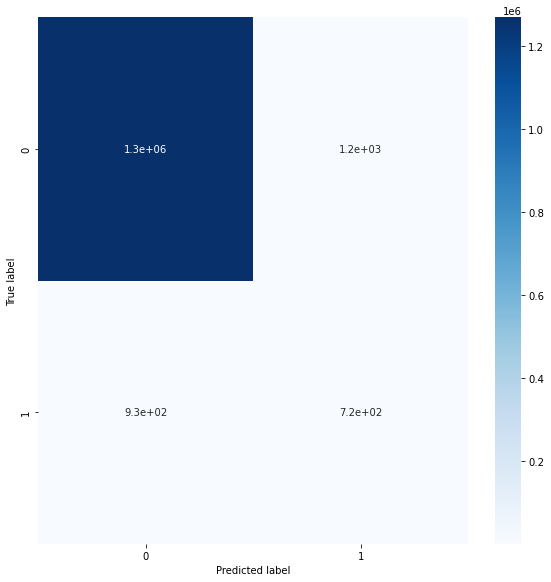

*******************************************
split number  4
[[      0 5083526]
 [      1    6570]]
Train data and test data shapes are:  (5090096, 11) (1272524, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9982509170750414
precision_score_train =  0.4232876712328767
accuracy_score_test =  0.998251506454888
precision_score_test =  0.4169202678027998
f1_score =  0.38108484005563287
[[1269614    1267]
 [    958     685]]


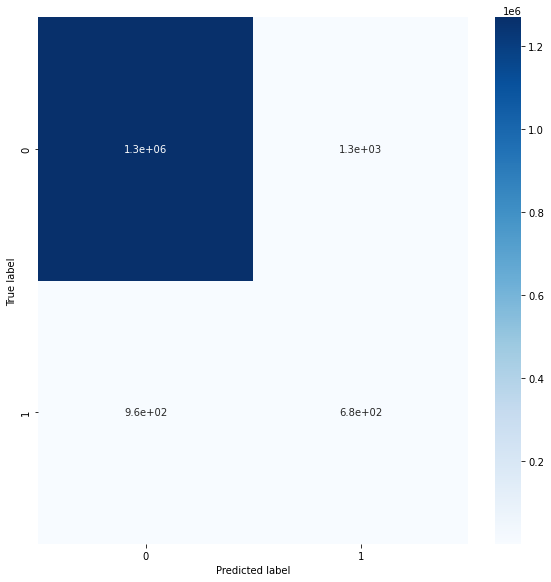

*******************************************
C =  0.1
degree =  1
----------------------------------
accuracy_score_train =  0.9982509170750414
precision_score_train =  0.4232876712328767
accuracy_score_test =  0.998251506454888
precision_score_test =  0.4169202678027998
f1_score =  0.38108484005563287
[[1269614    1267]
 [    958     685]]


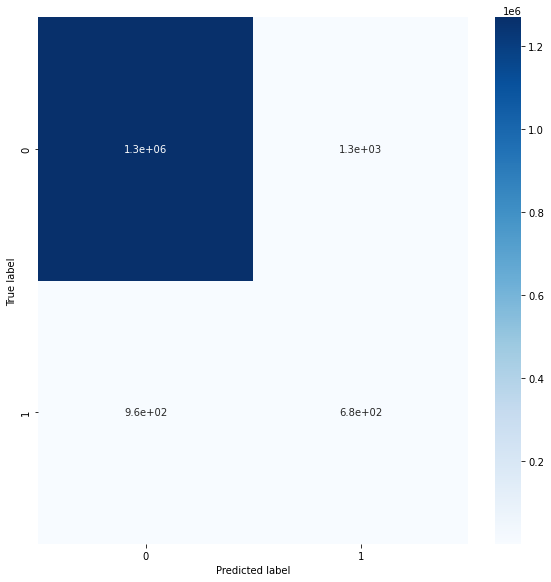

*******************************************
C =  1e-05
degree =  1
----------------------------------
accuracy_score_train =  0.9982509170750414
precision_score_train =  0.42343987823439877
accuracy_score_test =  0.998251506454888
precision_score_test =  0.4169202678027998
f1_score =  0.38108484005563287
[[1269614    1267]
 [    958     685]]


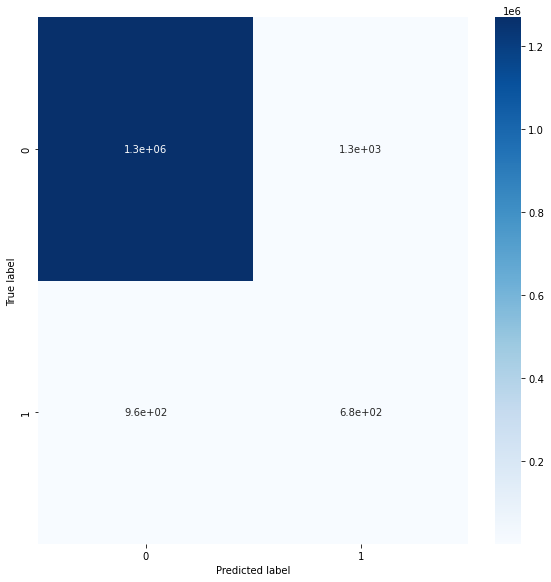

*******************************************
split number  5
[[      0 5083526]
 [      1    6570]]
Train data and test data shapes are:  (5090096, 11) (1272524, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9982589719329459
precision_score_train =  0.43120243531202435
accuracy_score_test =  0.9982507206150926
precision_score_test =  0.42422398052343274
f1_score =  0.38508287292817683
[[1269601    1280]
 [    946     697]]


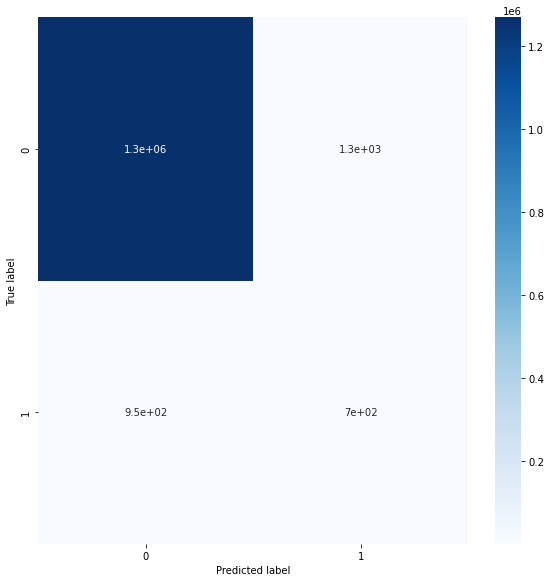

*******************************************
C =  0.1
degree =  1
----------------------------------
accuracy_score_train =  0.9982589719329459
precision_score_train =  0.43120243531202435
accuracy_score_test =  0.9982507206150926
precision_score_test =  0.42422398052343274
f1_score =  0.38508287292817683
[[1269601    1280]
 [    946     697]]


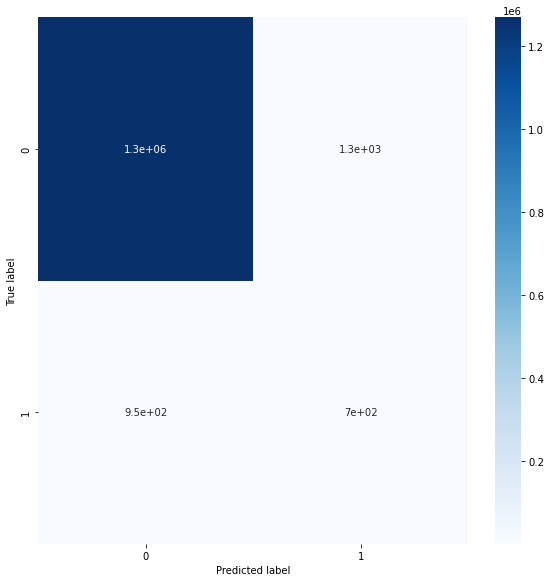

*******************************************
C =  1e-05
degree =  1
----------------------------------
accuracy_score_train =  0.9982589719329459
precision_score_train =  0.43120243531202435
accuracy_score_test =  0.9982507206150926
precision_score_test =  0.42422398052343274
f1_score =  0.38508287292817683
[[1269601    1280]
 [    946     697]]


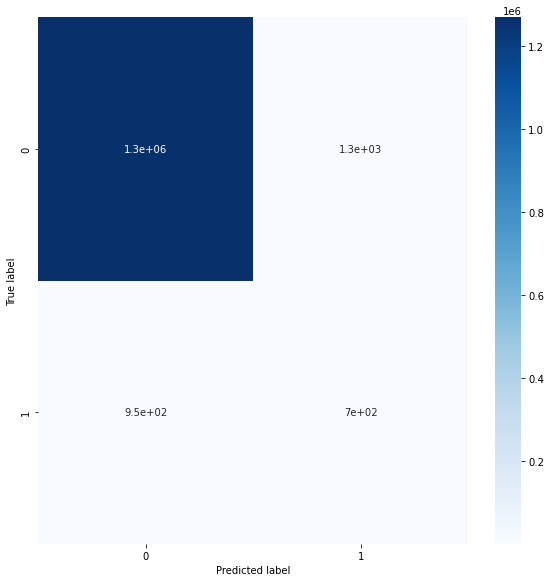

*******************************************
----------------------------------
degree =  1
splitter method is   kfold
Number of splits =  5
----------------------------------
split number  1
[[      0 5083423]
 [      1    6673]]
Train data and test data shapes are:  (5090096, 11) (1272524, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9990430435889618
precision_score_train =  0.4512213397272591
accuracy_score_test =  0.9745804401331527
precision_score_test =  0.7493506493506493
f1_score =  0.06659933631510605
[[1239023   31961]
 [    386    1154]]


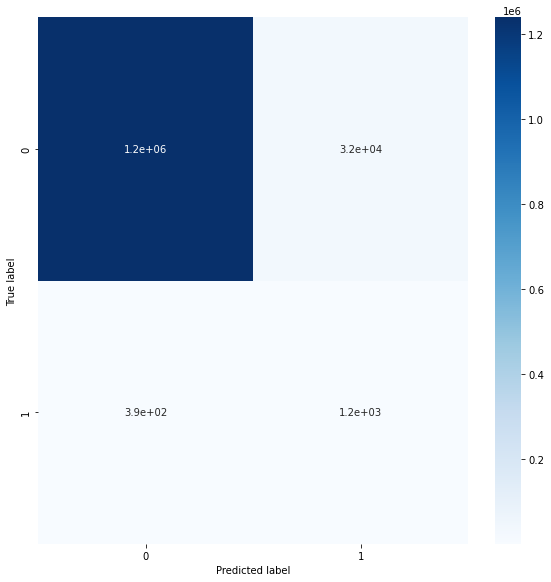

*******************************************
C =  0.1
degree =  1
----------------------------------
accuracy_score_train =  0.9990430435889618
precision_score_train =  0.4512213397272591
accuracy_score_test =  0.9745812259729483
precision_score_test =  0.7493506493506493
f1_score =  0.06660125815201709
[[1239024   31960]
 [    386    1154]]


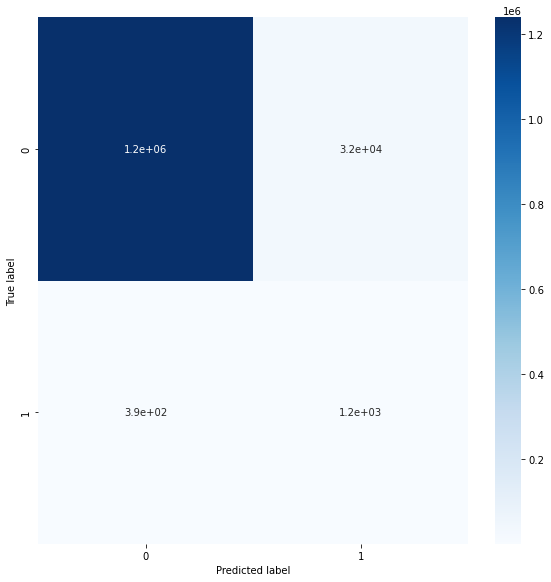

*******************************************
C =  1e-05
degree =  1
----------------------------------
accuracy_score_train =  0.9990430435889618
precision_score_train =  0.4512213397272591
accuracy_score_test =  0.9745930135698816
precision_score_test =  0.7493506493506493
f1_score =  0.06663009902133432
[[1239039   31945]
 [    386    1154]]


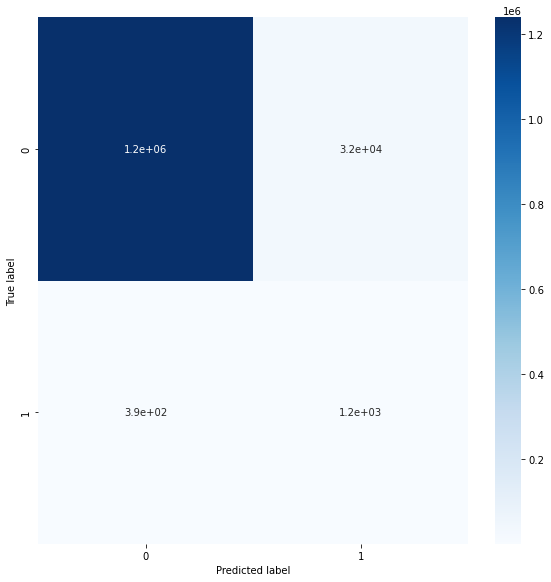

*******************************************
split number  2
[[      0 5082641]
 [      1    7455]]
Train data and test data shapes are:  (5090096, 11) (1272524, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9979503333532412
precision_score_train =  0.43420523138833
accuracy_score_test =  0.9996675897664798
precision_score_test =  0.5738786279683378
f1_score =  0.6728538283062645
[[1271666     100]
 [    323     435]]


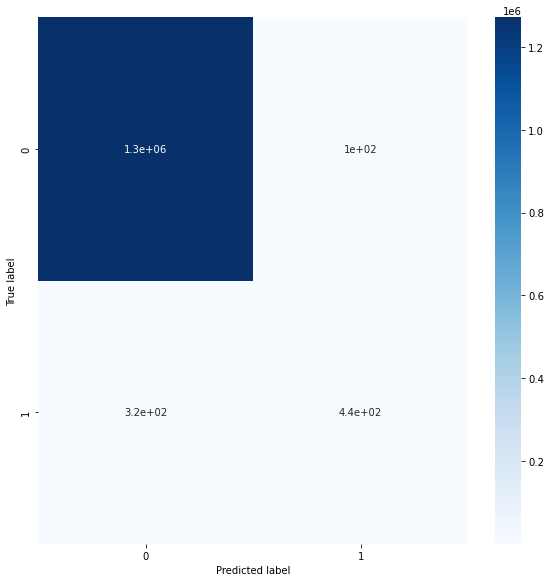

*******************************************
C =  0.1
degree =  1
----------------------------------
accuracy_score_train =  0.9979503333532412
precision_score_train =  0.43420523138833
accuracy_score_test =  0.9996675897664798
precision_score_test =  0.5738786279683378
f1_score =  0.6728538283062645
[[1271666     100]
 [    323     435]]


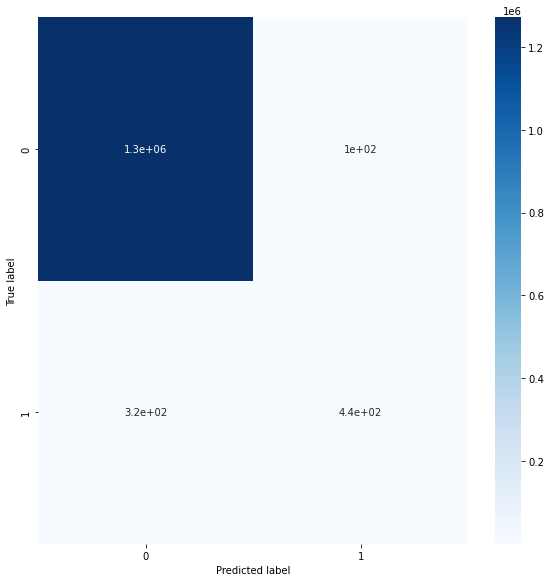

*******************************************
C =  1e-05
degree =  1
----------------------------------
accuracy_score_train =  0.9979509227330879
precision_score_train =  0.4343393695506372
accuracy_score_test =  0.9996675897664798
precision_score_test =  0.5738786279683378
f1_score =  0.6728538283062645
[[1271666     100]
 [    323     435]]


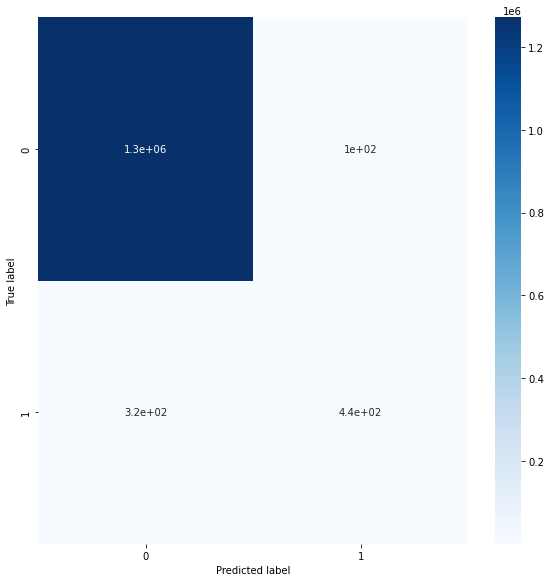

*******************************************
split number  3
[[      0 5082774]
 [      1    7322]]
Train data and test data shapes are:  (5090096, 11) (1272524, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9980389367901902
precision_score_train =  0.4255667850314122
accuracy_score_test =  0.9996062942624265
precision_score_test =  0.4500561167227834
f1_score =  0.6155026861089793
[[1271622      11]
 [    490     401]]


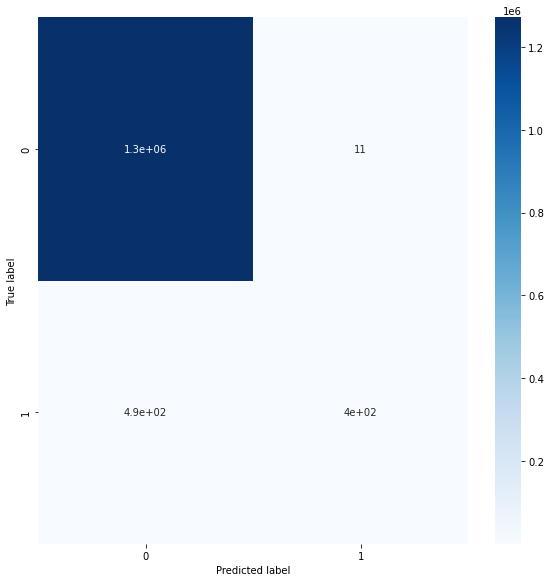

*******************************************
C =  0.1
degree =  1
----------------------------------
accuracy_score_train =  0.9980389367901902
precision_score_train =  0.4255667850314122
accuracy_score_test =  0.9996062942624265
precision_score_test =  0.4500561167227834
f1_score =  0.6155026861089793
[[1271622      11]
 [    490     401]]


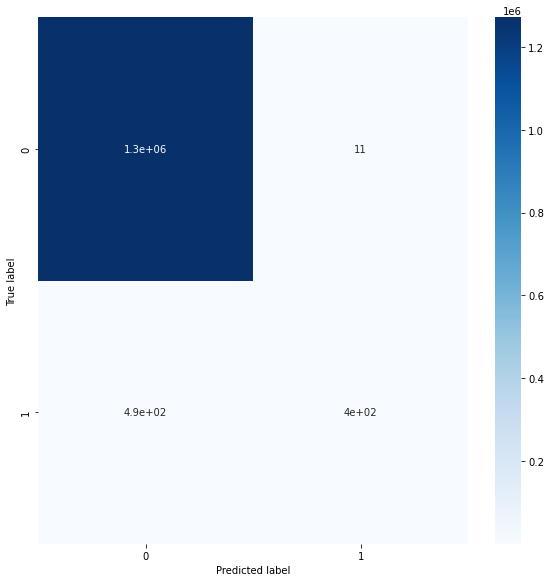

*******************************************
C =  1e-05
degree =  1
----------------------------------
accuracy_score_train =  0.9980397226299857
precision_score_train =  0.4255667850314122
accuracy_score_test =  0.9996062942624265
precision_score_test =  0.4500561167227834
f1_score =  0.6155026861089793
[[1271622      11]
 [    490     401]]


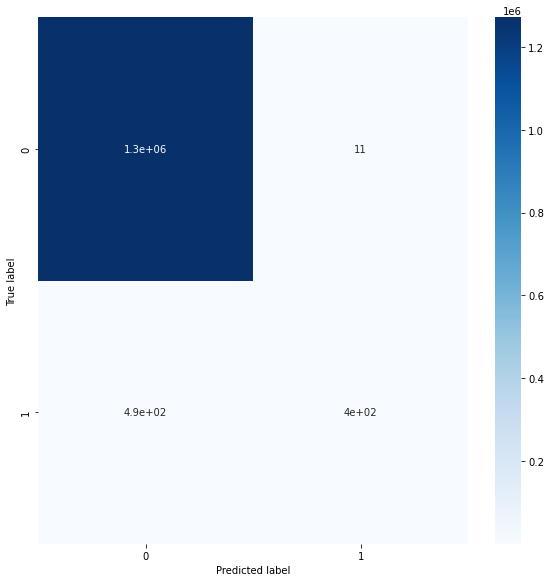

*******************************************
split number  4
[[      0 5082653]
 [      1    7443]]
Train data and test data shapes are:  (5090096, 11) (1272524, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9979894288830702
precision_score_train =  0.42509740695955933
accuracy_score_test =  0.9996235827379287
precision_score_test =  0.38181818181818183
f1_score =  0.5510777881911902
[[1271751       3]
 [    476     294]]


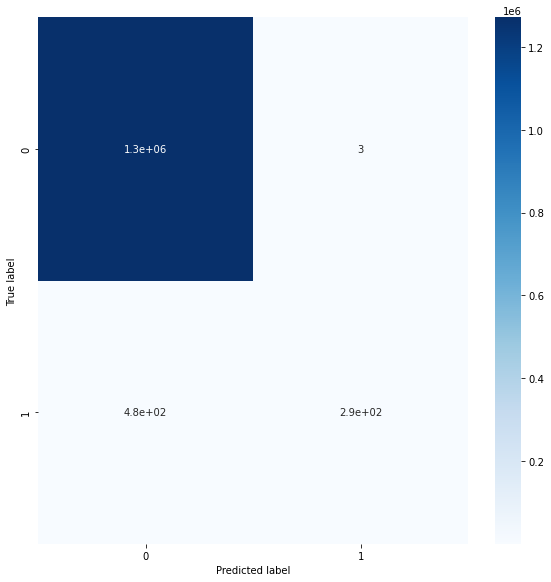

*******************************************
C =  0.1
degree =  1
----------------------------------
accuracy_score_train =  0.9979894288830702
precision_score_train =  0.42509740695955933
accuracy_score_test =  0.9996235827379287
precision_score_test =  0.38181818181818183
f1_score =  0.5510777881911902
[[1271751       3]
 [    476     294]]


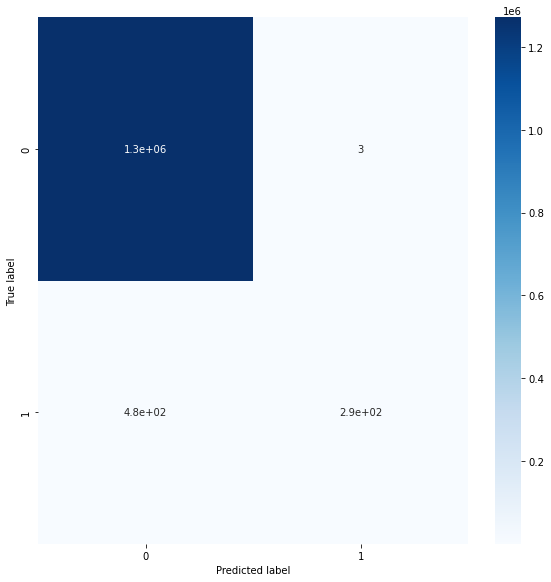

*******************************************
C =  1e-05
degree =  1
----------------------------------
accuracy_score_train =  0.9979900182629169
precision_score_train =  0.4252317613865377
accuracy_score_test =  0.9996235827379287
precision_score_test =  0.38181818181818183
f1_score =  0.5510777881911902
[[1271751       3]
 [    476     294]]


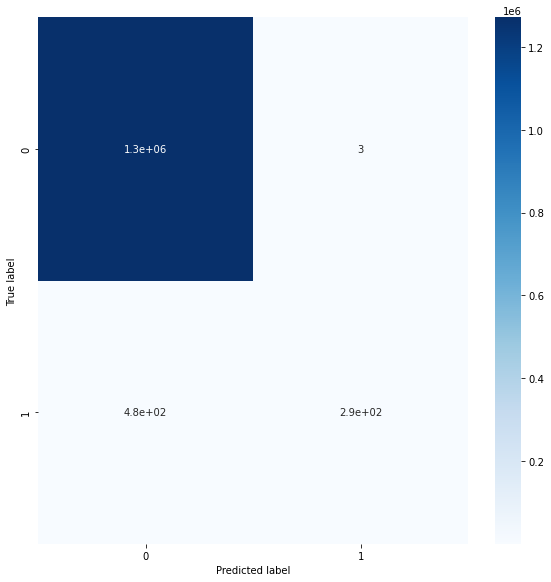

*******************************************
split number  5
[[      0 5086137]
 [      1    3959]]
Train data and test data shapes are:  (5090096, 11) (1272524, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9991760469743596
precision_score_train =  0.43773680222278355
accuracy_score_test =  0.9973124278991987
precision_score_test =  0.19605077574047955
f1_score =  0.3278301886792453
[[1268270       0]
 [   3420     834]]


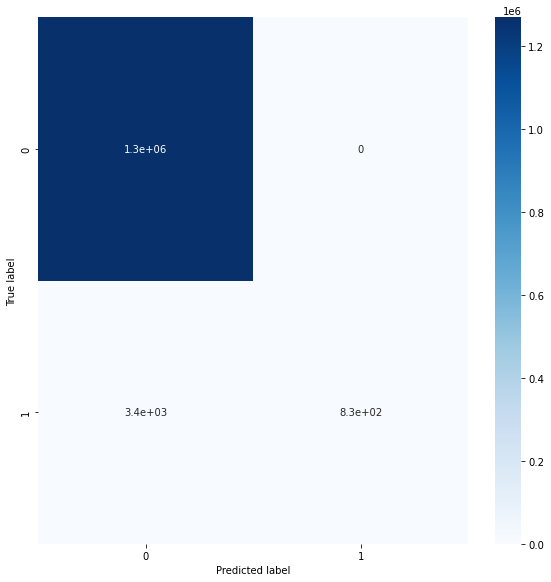

*******************************************
C =  0.1
degree =  1
----------------------------------
accuracy_score_train =  0.9991760469743596
precision_score_train =  0.43773680222278355
accuracy_score_test =  0.9973116420594031
precision_score_test =  0.19581570286788905
f1_score =  0.3275014743463731
[[1268270       0]
 [   3421     833]]


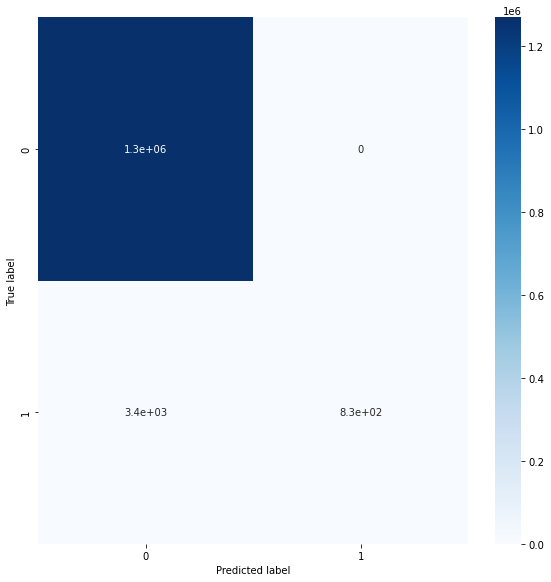

*******************************************
C =  1e-05
degree =  1
----------------------------------
accuracy_score_train =  0.9991784044937463
precision_score_train =  0.43824198029805506
accuracy_score_test =  0.9973132137389943
precision_score_test =  0.19628584861307005
f1_score =  0.328158773825899
[[1268270       0]
 [   3419     835]]


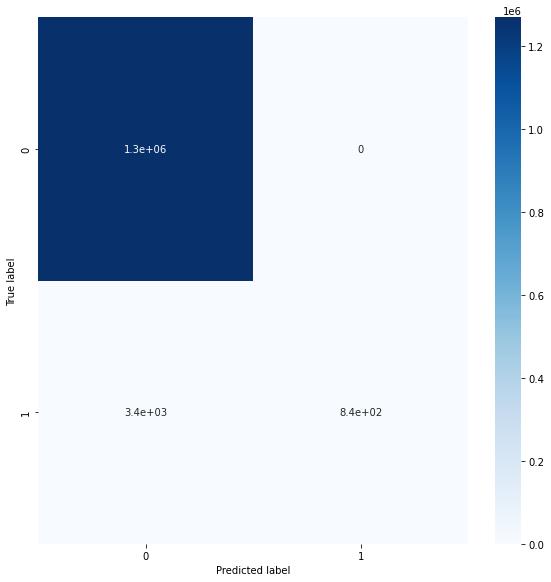

*******************************************
----------------------------------
degree =  2
splitter method is   sss
Number of splits =  5
----------------------------------
split number  1
[[      0 5083526]
 [      1    6570]]
Train data and test data shapes are:  (5090096, 77) (1272524, 77)
----------------------------------
C =  1
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


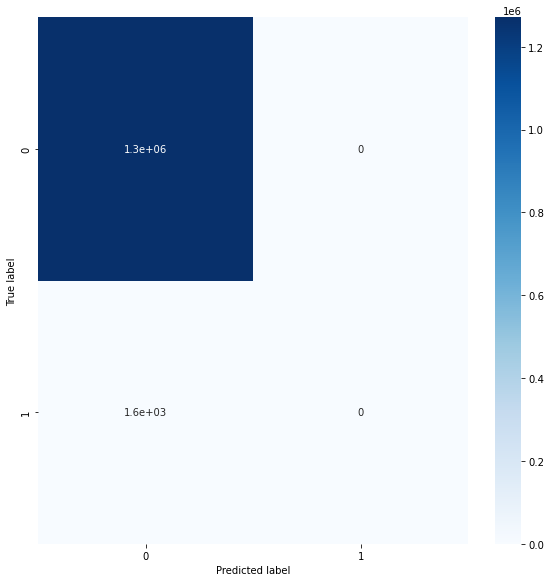

*******************************************
C =  0.1
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


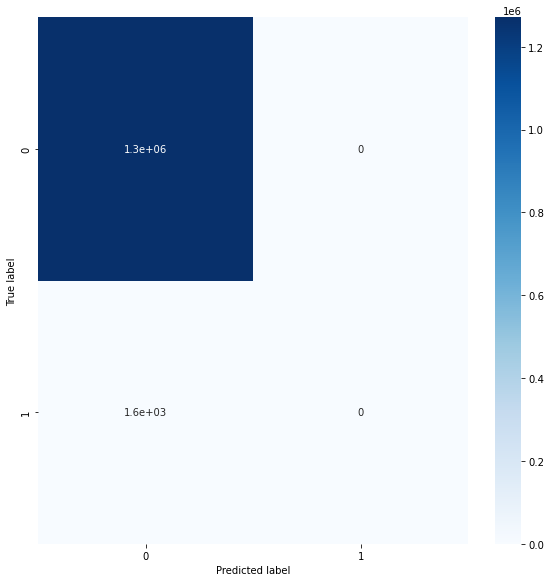

*******************************************
C =  1e-05
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


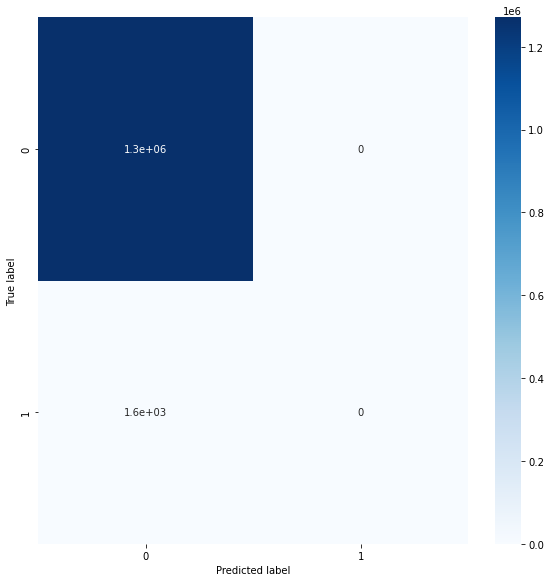

*******************************************
split number  2
[[      0 5083526]
 [      1    6570]]
Train data and test data shapes are:  (5090096, 77) (1272524, 77)
----------------------------------
C =  1
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


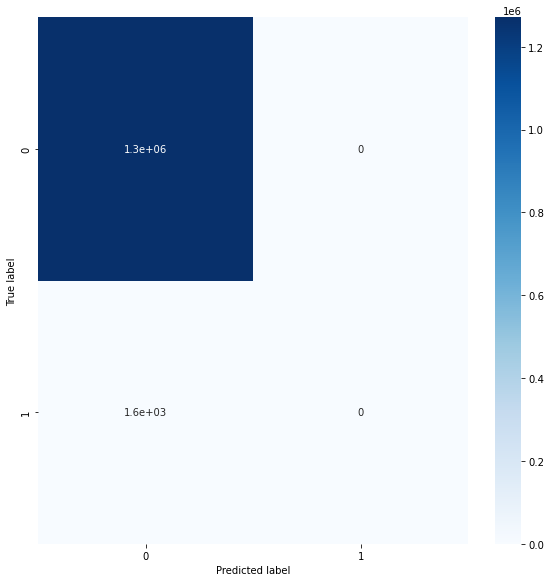

*******************************************
C =  0.1
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


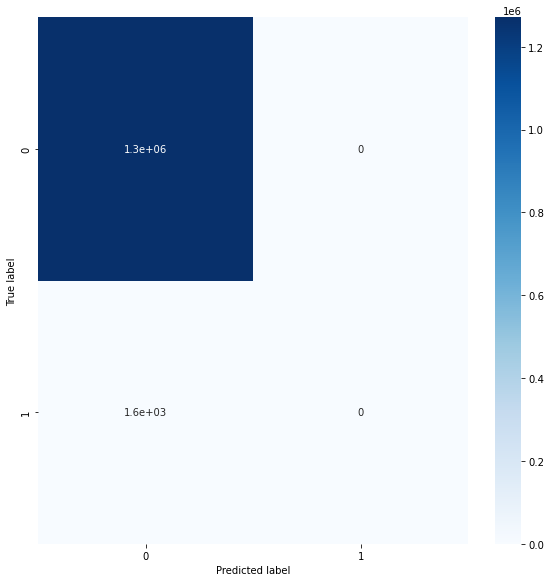

*******************************************
C =  1e-05
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


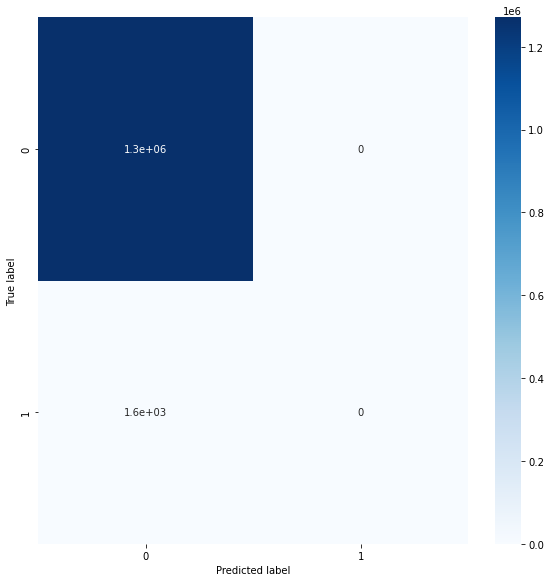

*******************************************
split number  3
[[      0 5083526]
 [      1    6570]]
Train data and test data shapes are:  (5090096, 77) (1272524, 77)
----------------------------------
C =  1
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


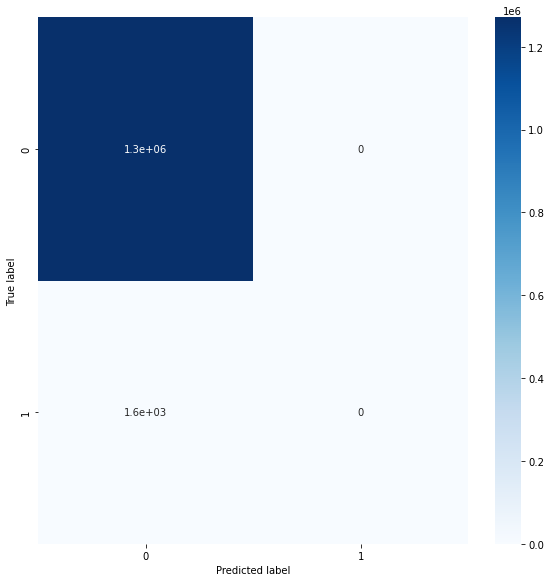

*******************************************
C =  0.1
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


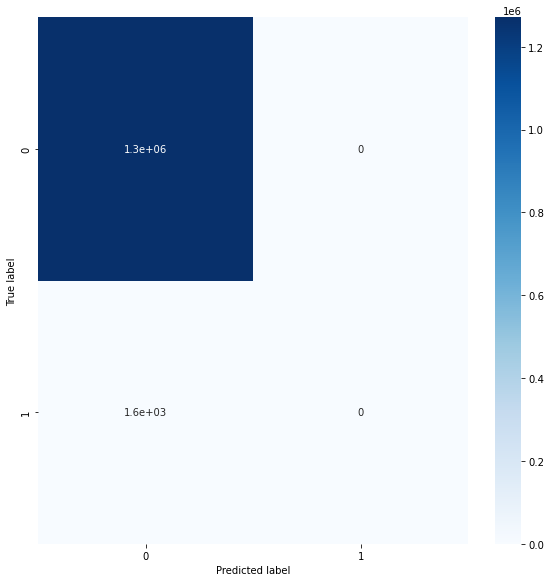

*******************************************
C =  1e-05
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


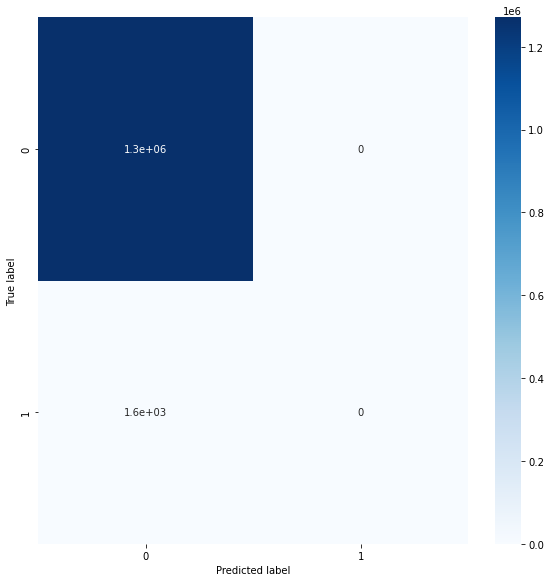

*******************************************
split number  4
[[      0 5083526]
 [      1    6570]]
Train data and test data shapes are:  (5090096, 77) (1272524, 77)
----------------------------------
C =  1
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


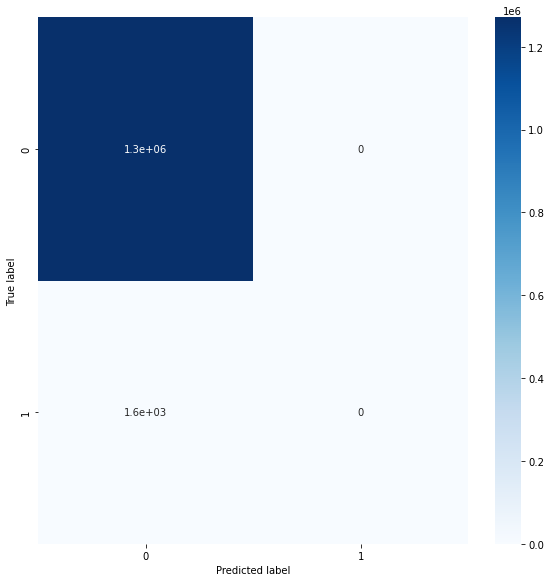

*******************************************
C =  0.1
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


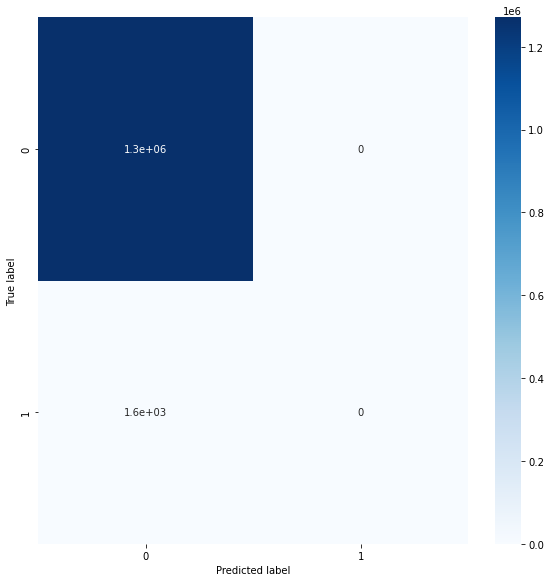

*******************************************
C =  1e-05
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


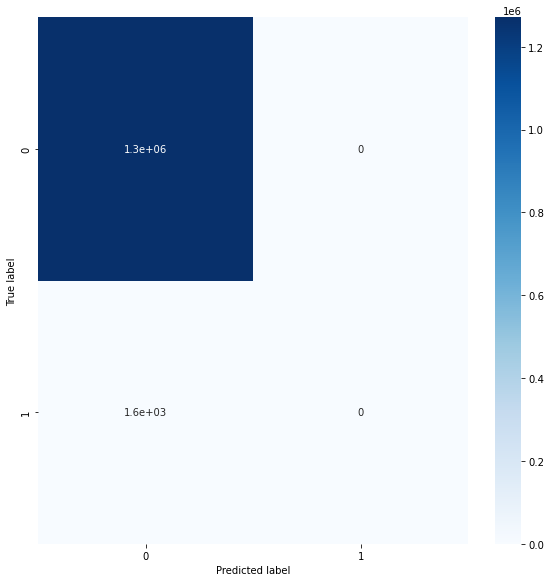

*******************************************
split number  5
[[      0 5083526]
 [      1    6570]]
Train data and test data shapes are:  (5090096, 77) (1272524, 77)
----------------------------------
C =  1
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


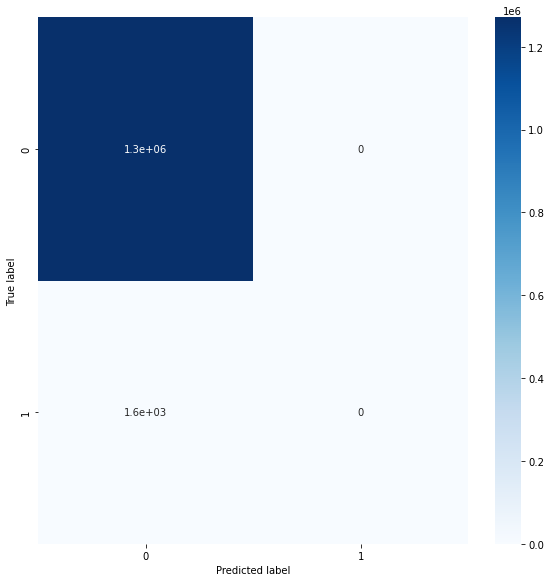

*******************************************
C =  0.1
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


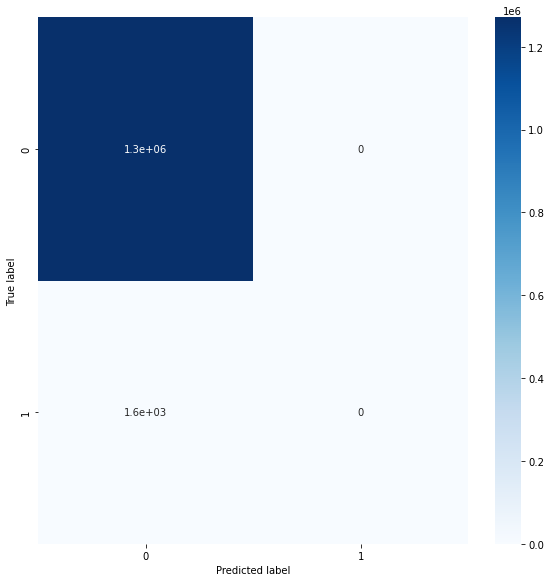

*******************************************
C =  1e-05
degree =  2
----------------------------------
accuracy_score_train =  0.9987092581357994
precision_score_train =  0.0
accuracy_score_test =  0.9987088652159016
precision_score_test =  0.0
f1_score =  0.0
[[1270881       0]
 [   1643       0]]


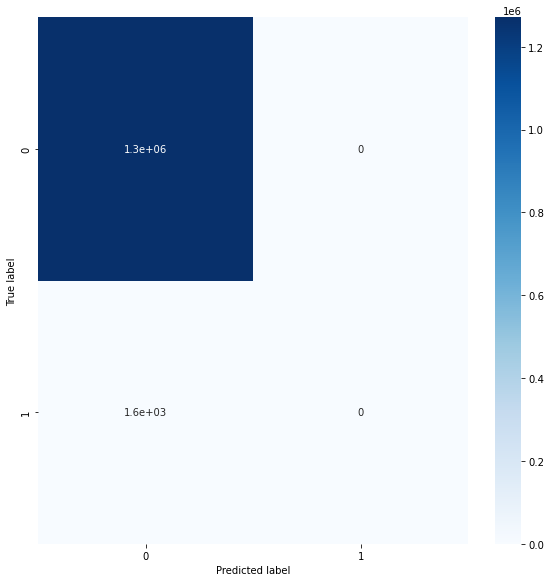

*******************************************
----------------------------------
degree =  2
splitter method is   kfold
Number of splits =  5
----------------------------------
split number  1
[[      0 5083423]
 [      1    6673]]
Train data and test data shapes are:  (5090096, 77) (1272524, 77)
----------------------------------
C =  1
degree =  2
----------------------------------
accuracy_score_train =  0.9986890227610639
precision_score_train =  0.0
accuracy_score_test =  0.9987898067148439
precision_score_test =  0.0
f1_score =  0.0
[[1270984       0]
 [   1540       0]]


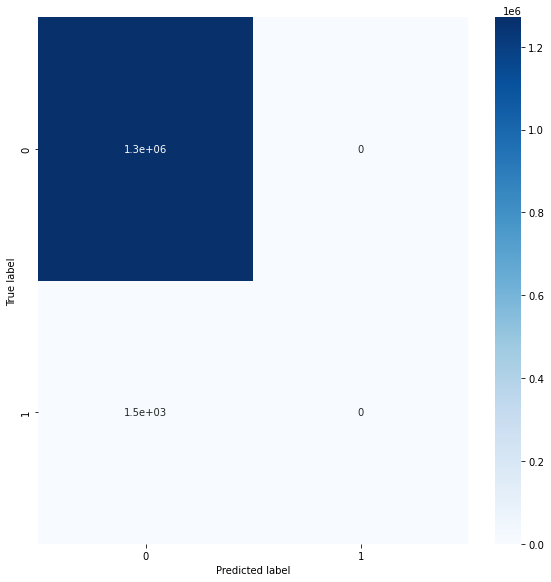

*******************************************
C =  0.1
degree =  2
----------------------------------
accuracy_score_train =  0.9986890227610639
precision_score_train =  0.0
accuracy_score_test =  0.9987898067148439
precision_score_test =  0.0
f1_score =  0.0
[[1270984       0]
 [   1540       0]]


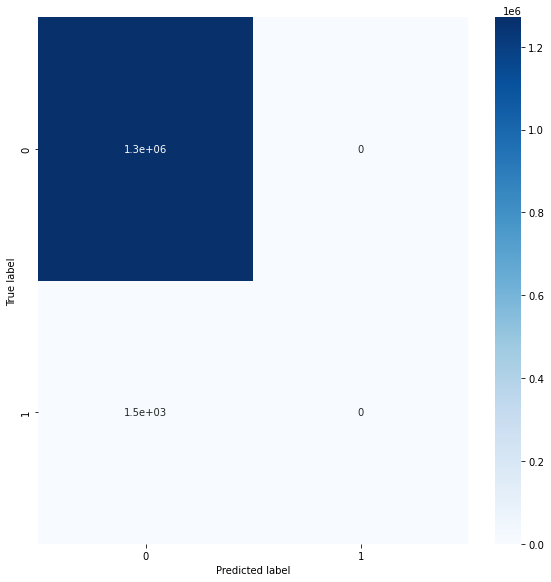

*******************************************
C =  1e-05
degree =  2
----------------------------------
accuracy_score_train =  0.9986890227610639
precision_score_train =  0.0
accuracy_score_test =  0.9987898067148439
precision_score_test =  0.0
f1_score =  0.0
[[1270984       0]
 [   1540       0]]


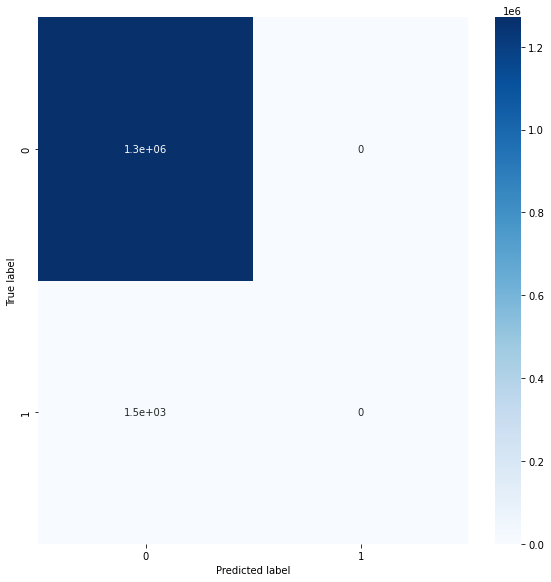

*******************************************
split number  2
[[      0 5082641]
 [      1    7455]]
Train data and test data shapes are:  (5090096, 77) (1272524, 77)
----------------------------------
C =  1
degree =  2
----------------------------------
accuracy_score_train =  0.9985353910810326
precision_score_train =  0.0
accuracy_score_test =  0.9994043334349686
precision_score_test =  0.0
f1_score =  0.0
[[1271766       0]
 [    758       0]]


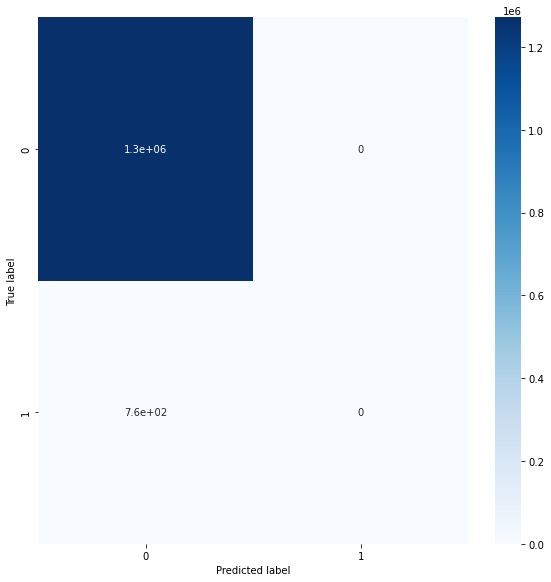

*******************************************
C =  0.1
degree =  2
----------------------------------
accuracy_score_train =  0.9985353910810326
precision_score_train =  0.0
accuracy_score_test =  0.9994043334349686
precision_score_test =  0.0
f1_score =  0.0
[[1271766       0]
 [    758       0]]


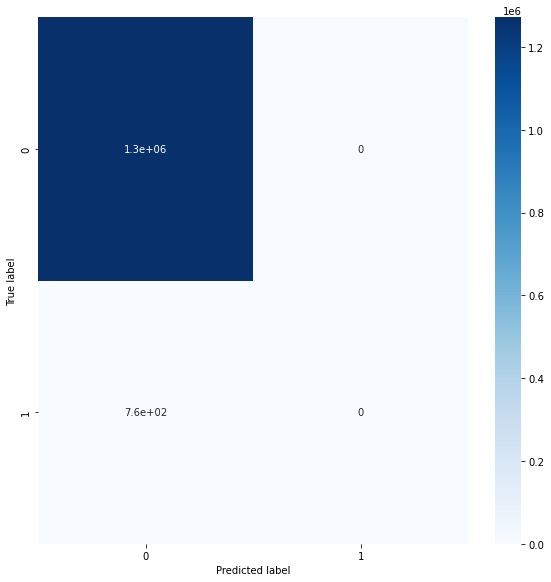

*******************************************
C =  1e-05
degree =  2
----------------------------------
accuracy_score_train =  0.9985353910810326
precision_score_train =  0.0
accuracy_score_test =  0.9994043334349686
precision_score_test =  0.0
f1_score =  0.0
[[1271766       0]
 [    758       0]]


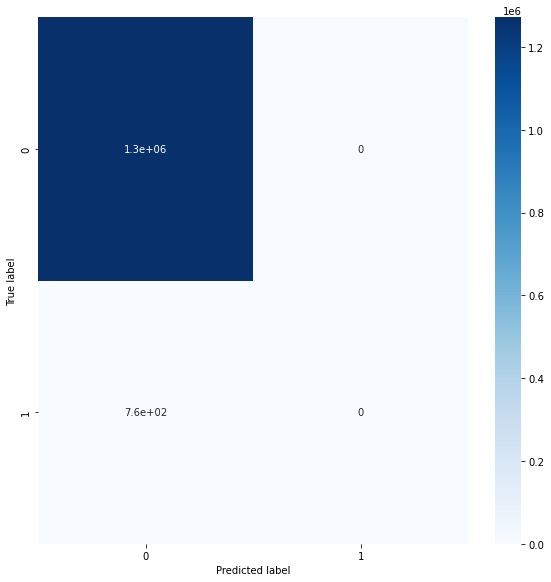

*******************************************
split number  3
[[      0 5082774]
 [      1    7322]]
Train data and test data shapes are:  (5090096, 77) (1272524, 77)
----------------------------------
C =  1
degree =  2
----------------------------------
accuracy_score_train =  0.9985615202542348
precision_score_train =  0.0
accuracy_score_test =  0.9992998167421597
precision_score_test =  0.0
f1_score =  0.0
[[1271633       0]
 [    891       0]]


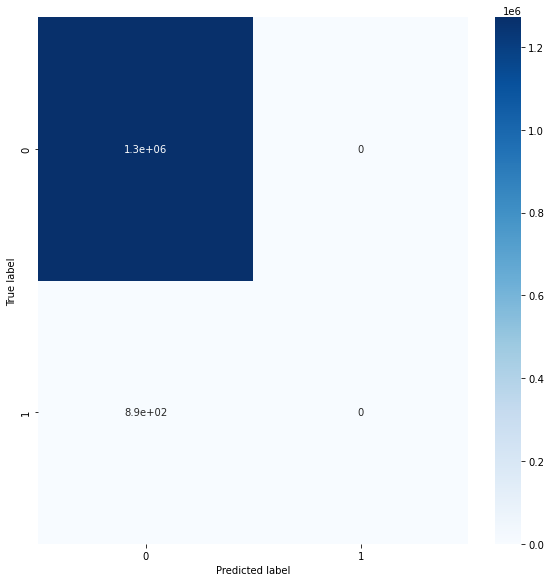

*******************************************
C =  0.1
degree =  2
----------------------------------
accuracy_score_train =  0.9985615202542348
precision_score_train =  0.0
accuracy_score_test =  0.9992998167421597
precision_score_test =  0.0
f1_score =  0.0
[[1271633       0]
 [    891       0]]


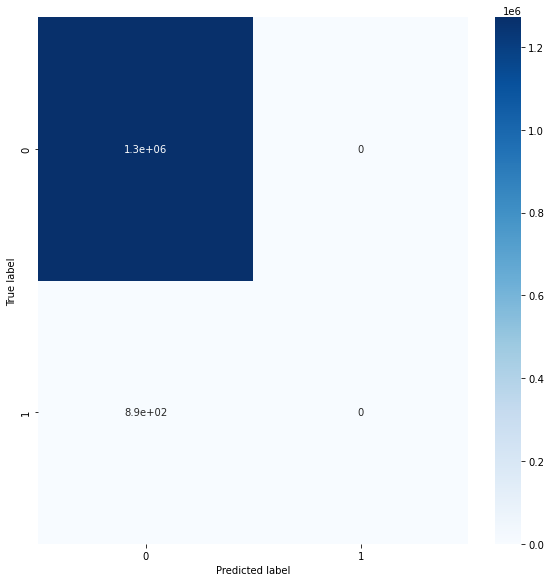

*******************************************
C =  1e-05
degree =  2
----------------------------------
accuracy_score_train =  0.9985615202542348
precision_score_train =  0.0
accuracy_score_test =  0.9992998167421597
precision_score_test =  0.0
f1_score =  0.0
[[1271633       0]
 [    891       0]]


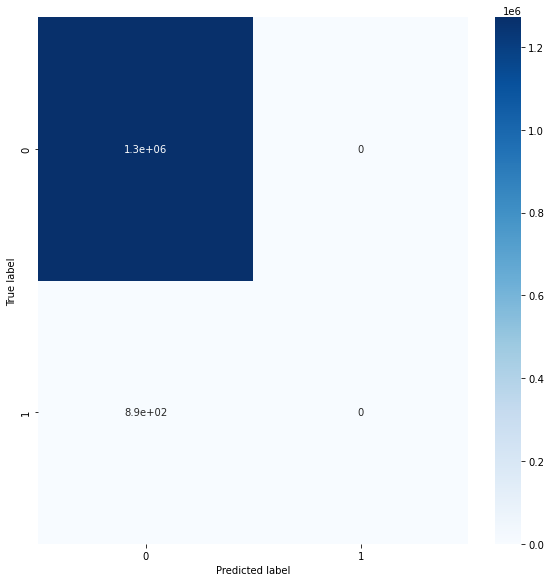

*******************************************
split number  4
[[      0 5082653]
 [      1    7443]]
Train data and test data shapes are:  (5090096, 77) (1272524, 77)
----------------------------------
C =  1
degree =  2
----------------------------------
accuracy_score_train =  0.9985377486004193
precision_score_train =  0.0
accuracy_score_test =  0.999394903357422
precision_score_test =  0.0
f1_score =  0.0
[[1271754       0]
 [    770       0]]


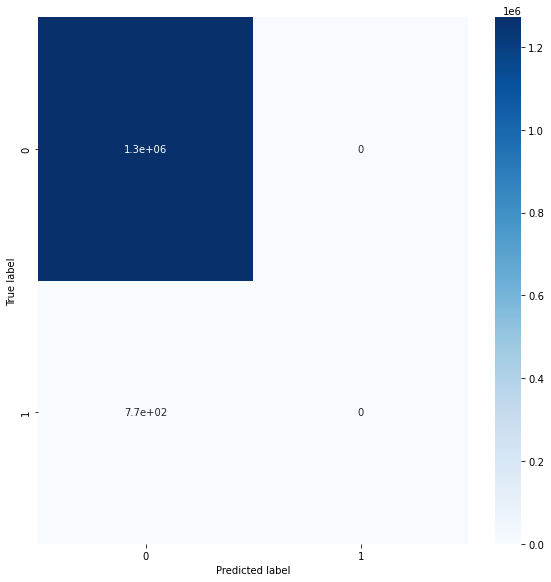

*******************************************
C =  0.1
degree =  2
----------------------------------
accuracy_score_train =  0.9985377486004193
precision_score_train =  0.0
accuracy_score_test =  0.999394903357422
precision_score_test =  0.0
f1_score =  0.0
[[1271754       0]
 [    770       0]]


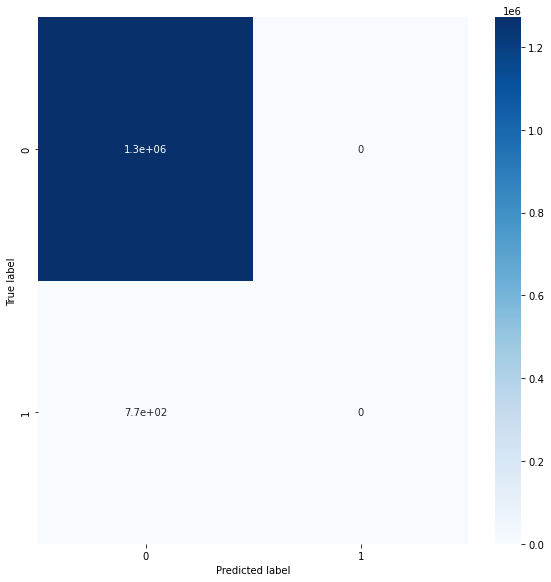

*******************************************
C =  1e-05
degree =  2
----------------------------------
accuracy_score_train =  0.9985377486004193
precision_score_train =  0.0
accuracy_score_test =  0.999394903357422
precision_score_test =  0.0
f1_score =  0.0
[[1271754       0]
 [    770       0]]


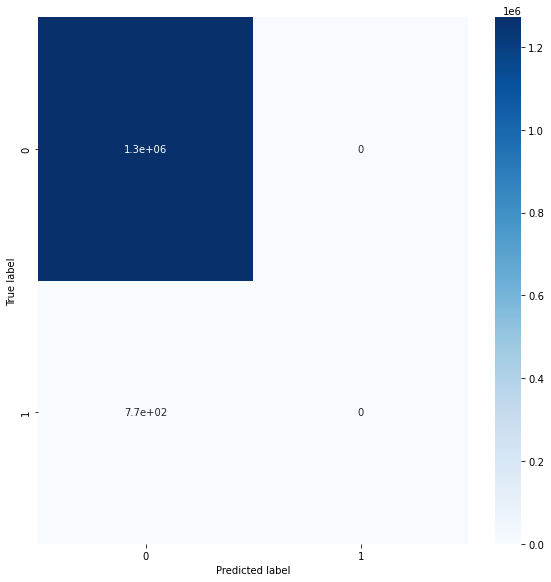

*******************************************
split number  5
[[      0 5086137]
 [      1    3959]]
Train data and test data shapes are:  (5090096, 77) (1272524, 77)
----------------------------------
C =  1
degree =  2
----------------------------------
accuracy_score_train =  0.9992222150623485
precision_score_train =  0.0
accuracy_score_test =  0.9966570375097051
precision_score_test =  0.0
f1_score =  0.0
[[1268270       0]
 [   4254       0]]


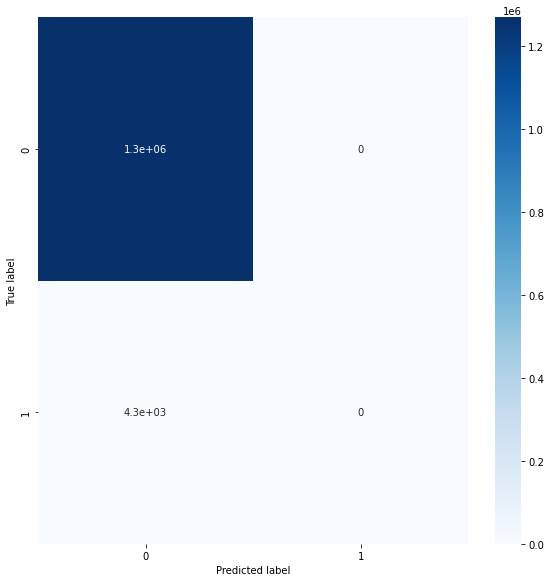

*******************************************
C =  0.1
degree =  2
----------------------------------
accuracy_score_train =  0.9992222150623485
precision_score_train =  0.0
accuracy_score_test =  0.9966570375097051
precision_score_test =  0.0
f1_score =  0.0
[[1268270       0]
 [   4254       0]]


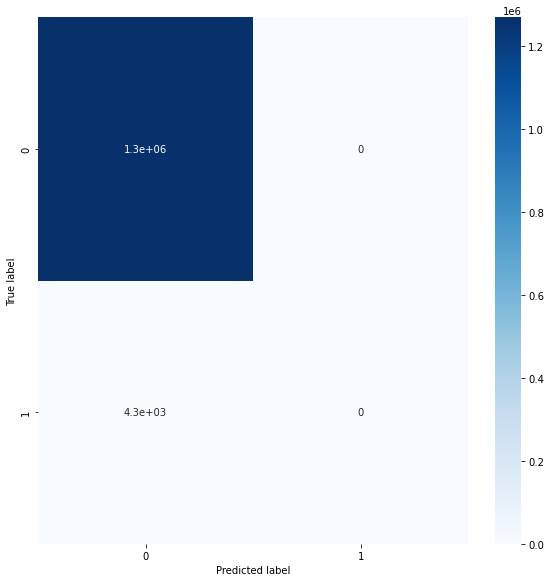

*******************************************
C =  1e-05
degree =  2
----------------------------------
accuracy_score_train =  0.9992222150623485
precision_score_train =  0.0
accuracy_score_test =  0.9966570375097051
precision_score_test =  0.0
f1_score =  0.0
[[1268270       0]
 [   4254       0]]


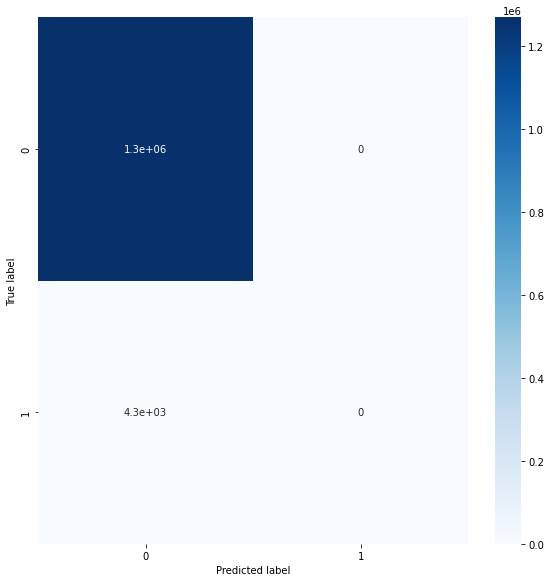

*******************************************


In [20]:
C = [1, 0.1, 0.00001]
for degree in range(1,3):
    for s in ['sss', 'kfold']:
             
        polynomial_logistic(degree, s, 5, C, X, Y)

#### Degree 2 performance is not suitable for this dataset
#### precision_score always = zero (No Frauds detected)
#### Also Regularization has a negliable effect

In [ ]:
#### Now trying degree = 1

In [45]:
time.localtime

<function time.localtime>

----------------------------------
degree =  1
splitter method is   skfold
Number of splits =  10
----------------------------------
split number  1
[[      0 5718966]
 [      1    7392]]
Train data and test data shapes are:  (5726358, 11) (636262, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9987590716472844
precision_score_train =  0.448728354978355
f1_score_train =  0.48282387190684134
accuracy_score_test =  0.97834382691407
precision_score_test =  0.7527405602923264
f1_score_test =  0.08231768231768231
[[621865  13576]
 [   203    618]]


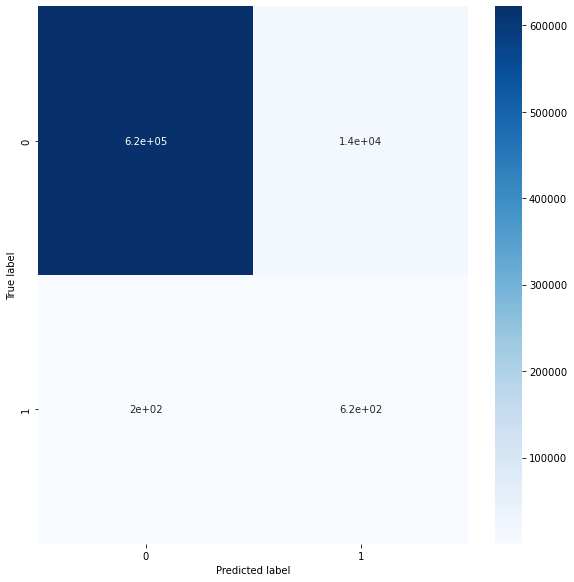

*******************************************
split number  2
[[      0 5718966]
 [      1    7392]]
Train data and test data shapes are:  (5726358, 11) (636262, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.998167770858895
precision_score_train =  0.4310064935064935
f1_score_train =  0.3778462998102467
accuracy_score_test =  0.9975874718276433
precision_score_test =  0.6662606577344702
f1_score_test =  0.41612780524914417
[[634180   1261]
 [   274    547]]


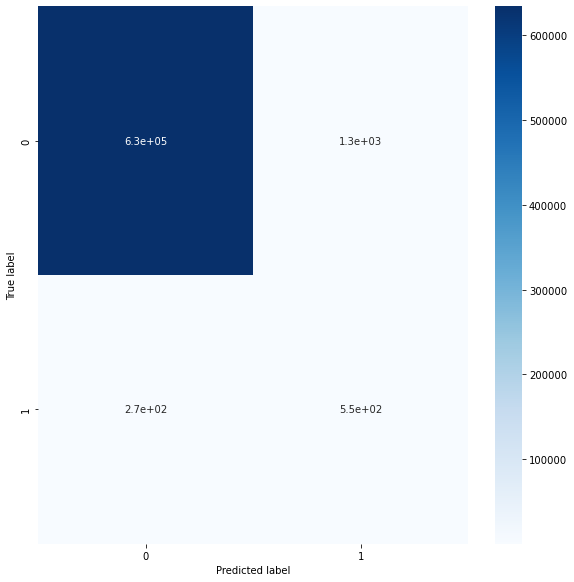

*******************************************
split number  3
[[      0 5718966]
 [      1    7392]]
Train data and test data shapes are:  (5726358, 11) (636262, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9982039194894905
precision_score_train =  0.4283008658008658
f1_score_train =  0.3810555455256665
accuracy_score_test =  0.9993288928145952
precision_score_test =  0.5554202192448234
f1_score_test =  0.6811053024645257
[[635379     62]
 [   365    456]]


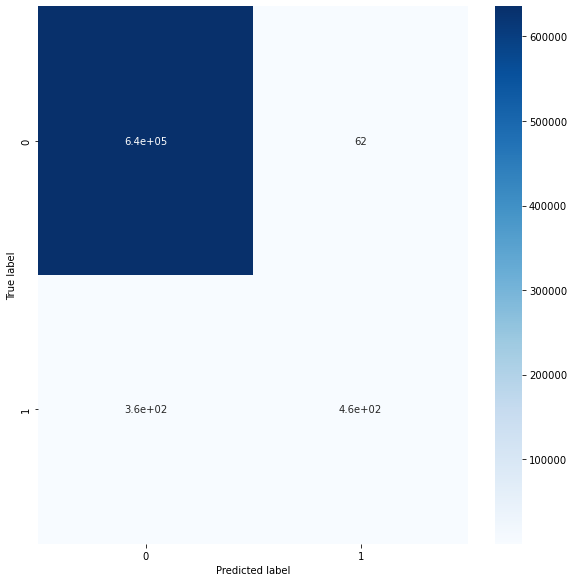

*******************************************
split number  4
[[      0 5718966]
 [      1    7392]]
Train data and test data shapes are:  (5726358, 11) (636262, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9982388457026263
precision_score_train =  0.4273538961038961
f1_score_train =  0.3851734438822167
accuracy_score_test =  0.999242450437084
precision_score_test =  0.4336175395858709
f1_score_test =  0.5963149078726968
[[635424     17]
 [   465    356]]


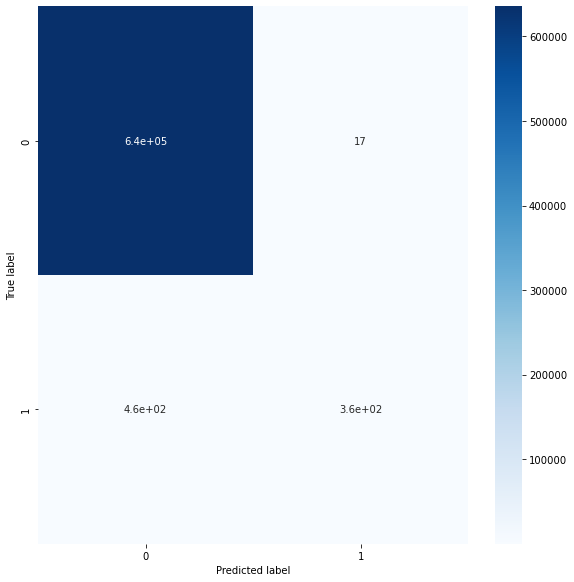

*******************************************
split number  5
[[      0 5718966]
 [      1    7392]]
Train data and test data shapes are:  (5726358, 11) (636262, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9982222557513868
precision_score_train =  0.424512987012987
f1_score_train =  0.3813806514341274
accuracy_score_test =  0.999212588524853
precision_score_test =  0.3946406820950061
f1_score_test =  0.5639686684073106
[[635437      4]
 [   497    324]]


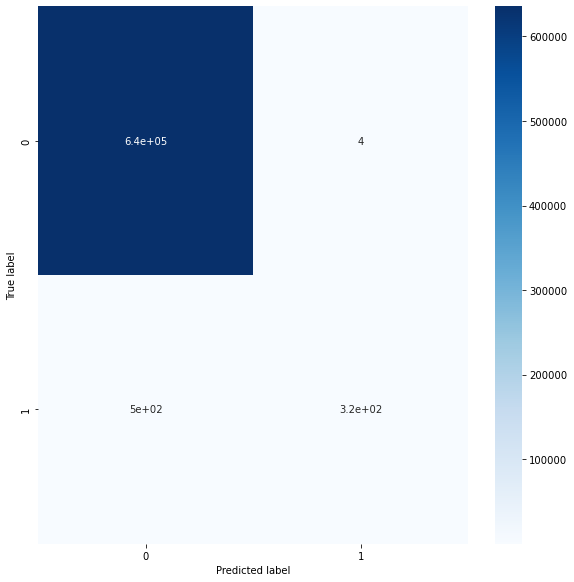

*******************************************
split number  6
[[      0 5718966]
 [      1    7392]]
Train data and test data shapes are:  (5726358, 11) (636262, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.998308698128898
precision_score_train =  0.44047619047619047
f1_score_train =  0.4020497623016608
accuracy_score_test =  0.9991968717289419
precision_score_test =  0.38246041412911086
f1_score_test =  0.5513608428446005
[[635437      4]
 [   507    314]]


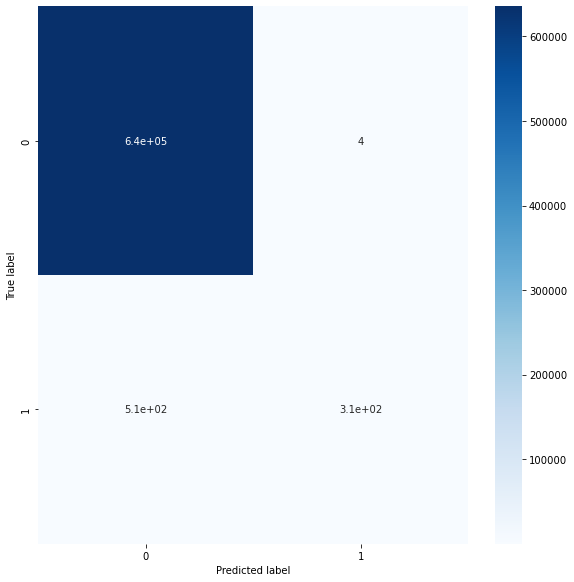

*******************************************
split number  7
[[      0 5718966]
 [      1    7392]]
Train data and test data shapes are:  (5726358, 11) (636262, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9982763913817474
precision_score_train =  0.42167207792207795
f1_score_train =  0.3871087928464978
accuracy_score_test =  0.9991481496616174
precision_score_test =  0.341047503045067
f1_score_test =  0.5081669691470055
[[635440      1]
 [   541    280]]


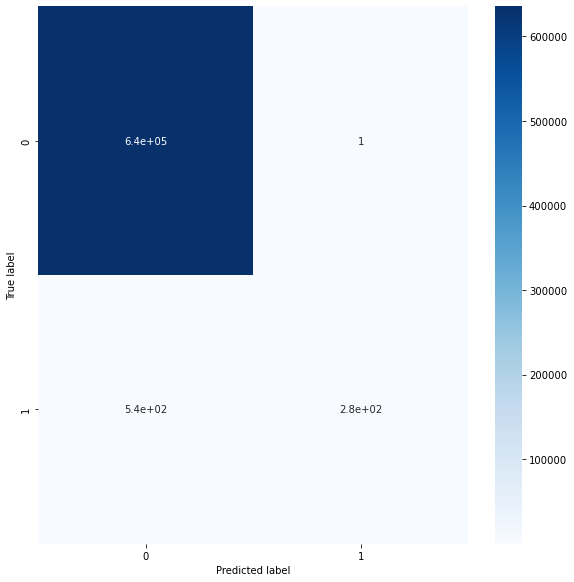

*******************************************
split number  8
[[      0 5718967]
 [      1    7391]]
Train data and test data shapes are:  (5726358, 11) (636262, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9982866946146224
precision_score_train =  0.4310648085509403
f1_score_train =  0.3937465241302602
accuracy_score_test =  0.9990381320902395
precision_score_test =  0.25669099756691
f1_score_test =  0.40812379110251445
[[635439      1]
 [   611    211]]


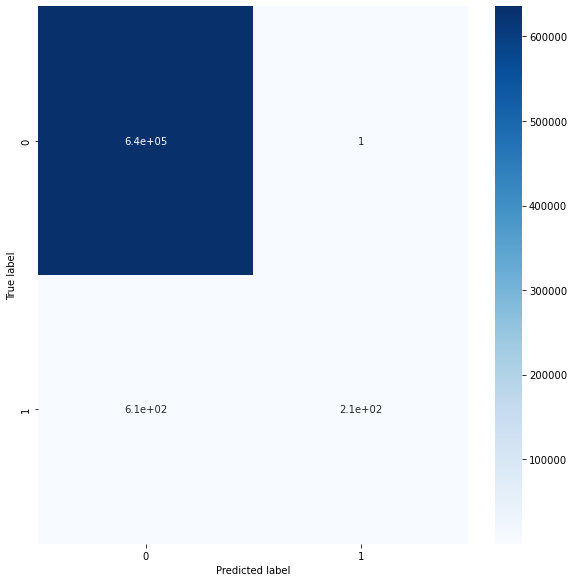

*******************************************
split number  9
[[      0 5718967]
 [      1    7391]]
Train data and test data shapes are:  (5726358, 11) (636262, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9983078249735696
precision_score_train =  0.43404140170477606
f1_score_train =  0.39836085930709053
accuracy_score_test =  0.9990255586535106
precision_score_test =  0.24574209245742093
f1_score_test =  0.39453125
[[635440      0]
 [   620    202]]


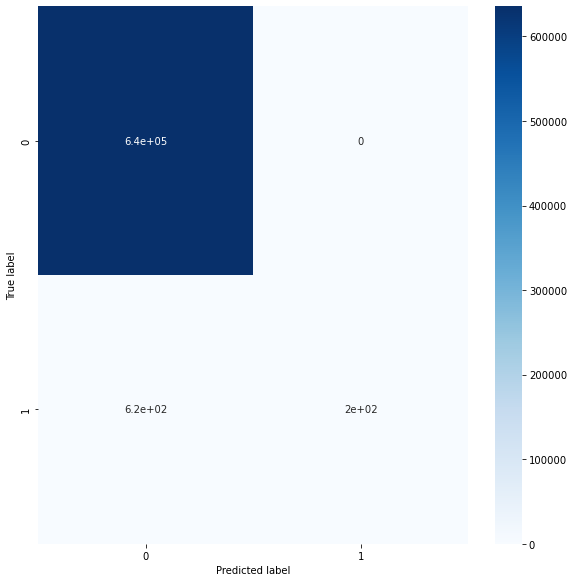

*******************************************
split number  10
[[      0 5718967]
 [      1    7391]]
Train data and test data shapes are:  (5726358, 11) (636262, 11)
----------------------------------
C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.9983659771184408
precision_score_train =  0.441212285211744
f1_score_train =  0.41073115435480817
accuracy_score_test =  0.9990412754494218
precision_score_test =  0.25790754257907544
f1_score_test =  0.4100580270793037
[[635440      0]
 [   610    212]]


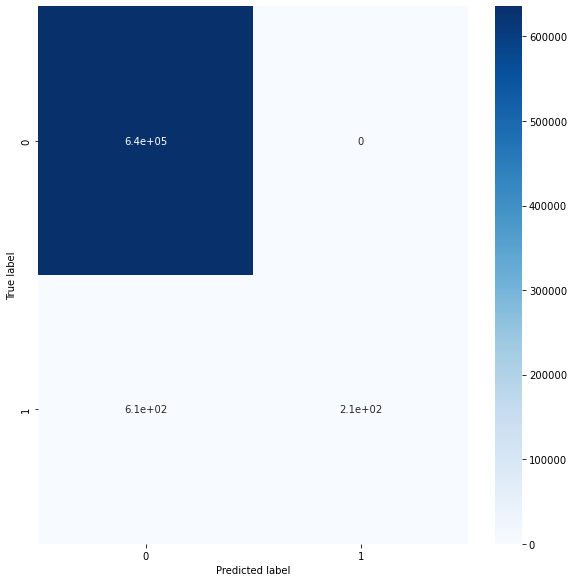

*******************************************
--- 934.8829498291016 seconds ---


In [78]:
start_time = time.time()
train_score, test_score = polynomial_logistic(1, 'skfold', 10, [1], X, Y)
print("--- %s seconds ---" % (time.time() - start_time))

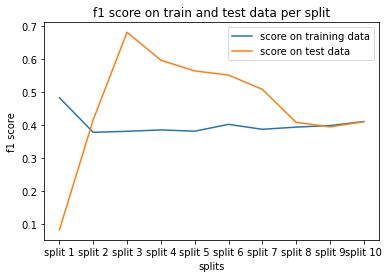

In [79]:
# line 1 points
x1 = ['split 1', 'split 2', 'split 3', 'split 4', 'split 5', 'split 6', 'split 7', 'split 8', 'split 9', 'split 10']
y1 = train_score
# plotting the line 1 points 
plt.plot(x1, y1, label = "score on training data")
# line 2 points
x2 = x1
y2 = test_score
# plotting the line 2 points 
plt.plot(x2, y2, label = "score on test data")
plt.xlabel('splits')
# Set the y axis label of the current axis.
plt.ylabel('f1 score')
# Set a title of the current axes.
plt.title('f1 score on train and test data per split')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


#### so, it lools like split 6 is best fitting for the data

In [83]:
split_method = StratifiedKFold(n_splits=10)
i = 0
for train_index, test_index in split_method.split(X,Y):
    if i == 5:
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
    i+=1
X_train.shape, X_test.shape

((5726358, 11), (636262, 11))

In [84]:
(unique, counts) = np.unique(Y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[      0 5718966]
 [      1    7392]]


C =  1
degree =  1
----------------------------------
accuracy_score_train =  0.998308698128898
precision_score_train =  0.44047619047619047
f1_score_train =  0.4020497623016608
accuracy_score_test =  0.9991968717289419
precision_score_test =  0.38246041412911086
f1_score_test =  0.5513608428446005
[[635437      4]
 [   507    314]]


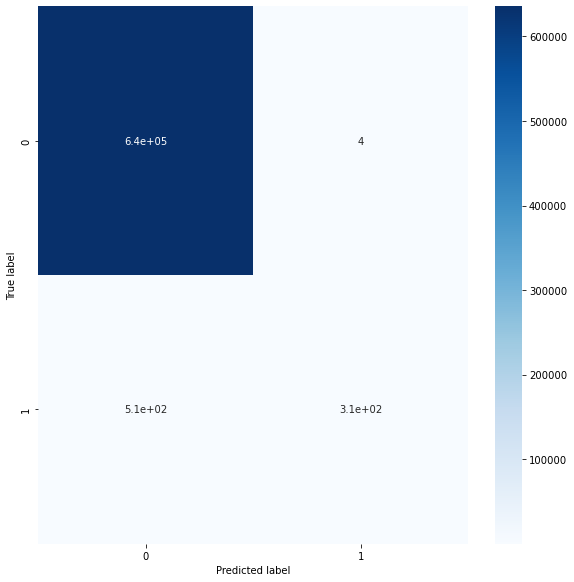

*******************************************
[[5713417    5549]
 [   4136    3256]]


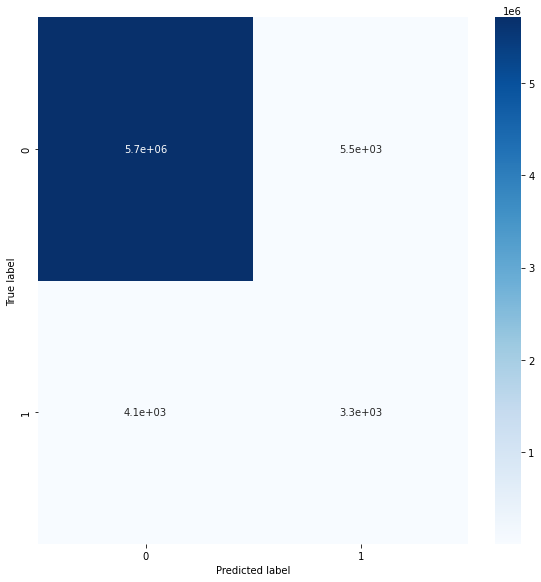

*******************************************


In [85]:
print('C = ', 1)
print('degree = ', 1)
print('----------------------------------')
model = LogisticRegression(random_state=0, C=1)

model.fit(X_train, Y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

print('accuracy_score_train = ',accuracy_score(y_pred_train, Y_train))
print('precision_score_train = ',precision_score(y_pred_train, Y_train))
print('f1_score_train = ', f1_score(y_pred_train, Y_train))

print('accuracy_score_test = ',accuracy_score(y_pred, Y_test))
print('precision_score_test = ',precision_score(y_pred, Y_test))
print('f1_score_test = ', f1_score(y_pred, Y_test))

matrix = confusion_matrix(Y_test,y_pred)
print(matrix)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('*******************************************')


matrix = confusion_matrix(Y_train, y_pred_train)
print(matrix)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(matrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('*******************************************')